---
<center>

  # **Tarea 05**

**Realizado Por:**

   Samuel Huertas Rojas

---
</center>

In [1]:
# Libreriras a importar
import numpy as np
import sympy as sp
import matplotlib.pyplot as plt
from scipy.integrate import quad, tplquad
from scipy.special import genlaguerre, factorial, lpmv
import math

from sympy.physics.hydrogen import Psi_nlm

# 1.

Defina factores de conversión a unidades atómicas.

In [1]:
"""
Conversor de unidades físicas a unidades atómicas (sistema Hartree)
"""

class AtomicUnitsConverter:
    """Conversor para unidades atómicas (sistema Hartree)"""
    
    # Factores de conversión de energía a Hartrees (Ha)
    ENERGY_TO_HARTREE = {
        'ev': 0.03674932217565499,  # electronvoltios
        'kcal/mol': 0.0015936010974213599,  # kilocalorías por mol
        'kj/mol': 0.00038087988470406095,  # kilojulios por mol
        'cm-1': 4.556335252767693e-06,  # número de onda (cm^-1)
        'hz': 1.5198298460570415e-16,  # herzios
        'j': 2.2937122783963248e+17,  # julios
        'ry': 0.5,  # Rydberg
    }
    
    # Factores de conversión de longitud a Bohr (a0)
    LENGTH_TO_BOHR = {
        'angstrom': 1.8897261246257702,  # Ångström
        'nm': 18.897261246257702,  # nanómetros
        'pm': 0.018897261246257702,  # picómetros
        'm': 1.8897261246257702e+10,  # metros
    }
    
    # Factores de conversión de tiempo a unidades atómicas (ℏ/Eh)
    TIME_TO_AU = {
        's': 4.1341373336493e+16,  # segundos
        'fs': 41341.373336493,  # femtosegundos
        'ps': 41.341373336493,  # picosegundos
    }
    
    @staticmethod
    def energy_to_hartree(value, unit):
        """
        Convierte energía de una unidad dada a Hartrees
        
        Args:
            value: valor numérico a convertir
            unit: unidad de origen (ej: 'ev', 'kcal/mol', 'kj/mol', 'cm-1')
        
        Returns:
            Energía en Hartrees (Ha)
        """
        unit = unit.lower()
        if unit == 'ha' or unit == 'hartree':
            return value
        
        if unit not in AtomicUnitsConverter.ENERGY_TO_HARTREE:
            raise ValueError(f"Unidad '{unit}' no reconocida. Usa: {list(AtomicUnitsConverter.ENERGY_TO_HARTREE.keys())}")
        
        return value * AtomicUnitsConverter.ENERGY_TO_HARTREE[unit]
    
    @staticmethod
    def hartree_to_energy(value, unit):
        """
        Convierte energía de Hartrees a otra unidad
        
        Args:
            value: valor en Hartrees
            unit: unidad de destino (ej: 'ev', 'kcal/mol', 'kj/mol', 'cm-1')
        
        Returns:
            Energía en la unidad especificada
        """
        unit = unit.lower()
        if unit == 'ha' or unit == 'hartree':
            return value
        
        if unit not in AtomicUnitsConverter.ENERGY_TO_HARTREE:
            raise ValueError(f"Unidad '{unit}' no reconocida. Usa: {list(AtomicUnitsConverter.ENERGY_TO_HARTREE.keys())}")
        
        return value / AtomicUnitsConverter.ENERGY_TO_HARTREE[unit]
    
    @staticmethod
    def length_to_bohr(value, unit):
        """
        Convierte longitud a Bohr (a0)
        
        Args:
            value: valor numérico
            unit: unidad de origen (ej: 'angstrom', 'nm', 'pm')
        
        Returns:
            Longitud en Bohr (a0)
        """
        unit = unit.lower()
        if unit == 'bohr' or unit == 'a0':
            return value
        
        if unit not in AtomicUnitsConverter.LENGTH_TO_BOHR:
            raise ValueError(f"Unidad '{unit}' no reconocida. Usa: {list(AtomicUnitsConverter.LENGTH_TO_BOHR.keys())}")
        
        return value * AtomicUnitsConverter.LENGTH_TO_BOHR[unit]
    
    @staticmethod
    def bohr_to_length(value, unit):
        """
        Convierte de Bohr a otra unidad de longitud
        
        Args:
            value: valor en Bohr
            unit: unidad de destino
        
        Returns:
            Longitud en la unidad especificada
        """
        unit = unit.lower()
        if unit == 'bohr' or unit == 'a0':
            return value
        
        if unit not in AtomicUnitsConverter.LENGTH_TO_BOHR:
            raise ValueError(f"Unidad '{unit}' no reconocida. Usa: {list(AtomicUnitsConverter.LENGTH_TO_BOHR.keys())}")
        
        return value / AtomicUnitsConverter.LENGTH_TO_BOHR[unit]
    
    @staticmethod
    def time_to_au(value, unit):
        """
        Convierte tiempo a unidades atómicas
        
        Args:
            value: valor numérico
            unit: unidad de origen (ej: 's', 'fs', 'ps')
        
        Returns:
            Tiempo en unidades atómicas
        """
        unit = unit.lower()
        if unit == 'au':
            return value
        
        if unit not in AtomicUnitsConverter.TIME_TO_AU:
            raise ValueError(f"Unidad '{unit}' no reconocida. Usa: {list(AtomicUnitsConverter.TIME_TO_AU.keys())}")
        
        return value * AtomicUnitsConverter.TIME_TO_AU[unit]
    
    @staticmethod
    def au_to_time(value, unit):
        """
        Convierte de unidades atómicas a otra unidad de tiempo
        
        Args:
            value: valor en unidades atómicas
            unit: unidad de destino
        
        Returns:
            Tiempo en la unidad especificada
        """
        unit = unit.lower()
        if unit == 'au':
            return value
        
        if unit not in AtomicUnitsConverter.TIME_TO_AU:
            raise ValueError(f"Unidad '{unit}' no reconocida. Usa: {list(AtomicUnitsConverter.TIME_TO_AU.keys())}")
        
        return value / AtomicUnitsConverter.TIME_TO_AU[unit]


# Ejemplo de uso
conv = AtomicUnitsConverter()

# Conversiones de energía
print("=== CONVERSIONES DE ENERGÍA ===")
energia_ev = 27.2114
energia_ha = conv.energy_to_hartree(energia_ev, 'eV')
print(f"{energia_ev} eV = {energia_ha:.6f} Ha")

energia_kcal = 627.509
energia_ha2 = conv.energy_to_hartree(energia_kcal, 'kcal/mol')
print(f"{energia_kcal} kcal/mol = {energia_ha2:.6f} Ha")

# De Hartree a otras unidades
ha_value = 1.0
print(f"\n{ha_value} Ha = {conv.hartree_to_energy(ha_value, 'eV'):.4f} eV")
print(f"{ha_value} Ha = {conv.hartree_to_energy(ha_value, 'kcal/mol'):.4f} kcal/mol")
print(f"{ha_value} Ha = {conv.hartree_to_energy(ha_value, 'kj/mol'):.4f} kJ/mol")

# Conversiones de longitud
print("\n=== CONVERSIONES DE LONGITUD ===")
dist_angstrom = 1.0
dist_bohr = conv.length_to_bohr(dist_angstrom, 'angstrom')
print(f"{dist_angstrom} Å = {dist_bohr:.6f} a0 (Bohr)")

bohr_value = 1.0
print(f"{bohr_value} a0 = {conv.bohr_to_length(bohr_value, 'angstrom'):.6f} Å")

# Conversiones de tiempo
print("\n=== CONVERSIONES DE TIEMPO ===")
time_fs = 1.0
time_au = conv.time_to_au(time_fs, 'fs')
print(f"{time_fs} fs = {time_au:.6f} au (tiempo)")

=== CONVERSIONES DE ENERGÍA ===
27.2114 eV = 1.000001 Ha
627.509 kcal/mol = 0.999999 Ha

1.0 Ha = 27.2114 eV
1.0 Ha = 627.5096 kcal/mol
1.0 Ha = 2625.4996 kJ/mol

=== CONVERSIONES DE LONGITUD ===
1.0 Å = 1.889726 a0 (Bohr)
1.0 a0 = 0.529177 Å

=== CONVERSIONES DE TIEMPO ===
1.0 fs = 41341.373336 au (tiempo)


# 2.
Dibuje las funciones y densidaddes radiales.



Tenemos que as funciones radiales se definen como: 

<center>

$
R_{nl}(r) = \left[ \frac{(n-\ell-1)!}{2n(n+\ell)!} \right]^{1/2} \left( \frac{2Z\mu}{n} \right)^{l+3/2} r^{\ell} e^{\frac{-Zr\mu}{n}} L_{n-\ell-1}^{2\ell+1} (\dfrac{2Z\mu r}{n})
$

</center>

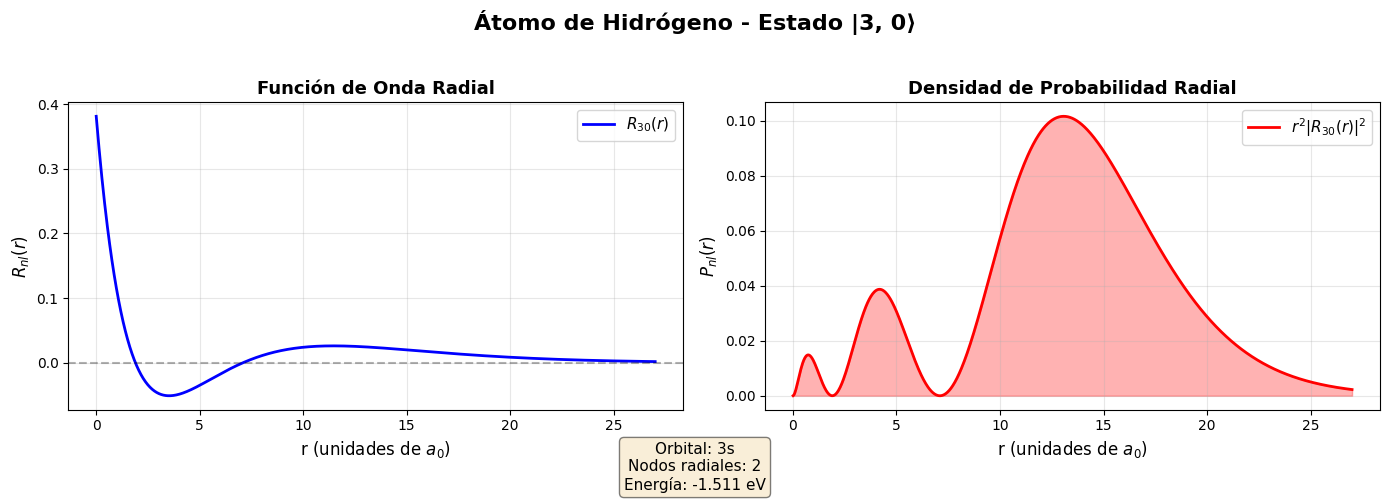

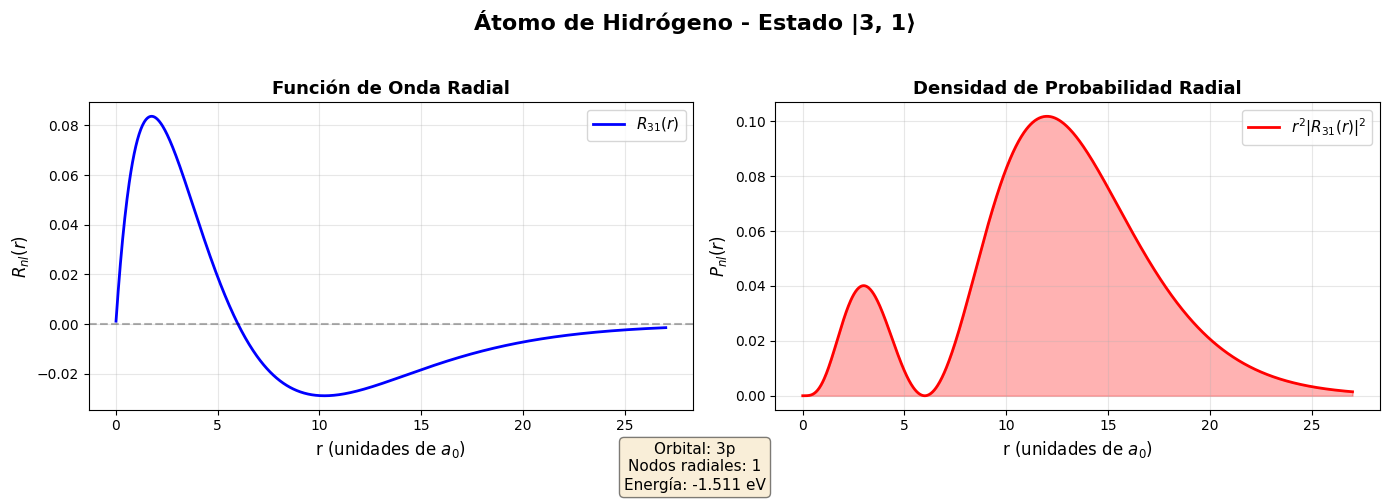

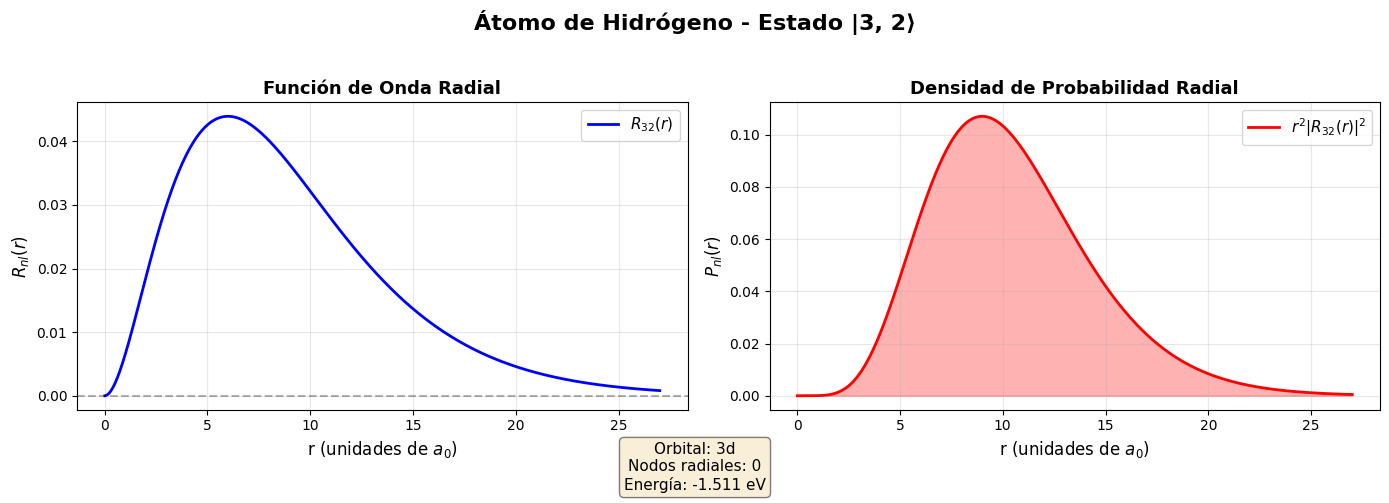

In [2]:
def radial_wavefunction(n, l, r):  # noqa: E741
    """
    Calcula la función de onda radial R_nl(r) para el átomo de hidrógeno.

    Parámetros:
    n: número cuántico principal (n >= 1)
    l: número cuántico azimutal (0 <= l < n)
    r: distancia radial (array o escalar)
    """
    a0 = 1
    rho = 2 * r / (n * a0)

    # Normalización
    normalization = np.sqrt(
        (2 / (n * a0)) ** 3 * factorial(n - l - 1) / (2 * n * factorial(n + l))
    )

    # Polinomio de Laguerre asociado
    laguerre = genlaguerre(n - l - 1, 2 * l + 1)(rho)

    # Función de onda radial
    R_nl = normalization * np.exp(-rho / 2) * rho**l * laguerre

    return R_nl


def radial_density(n, l, r):  # noqa: E741
    """
    Calcula la densidad de probabilidad radial r²|R_nl(r)|².
    """
    R = radial_wavefunction(n, l, r)
    return r**2 * R**2


def plot_hydrogen_orbitals(n, l):  # noqa: E741
    """
    Grafica la función de onda radial y la densidad de probabilidad.
    """
    # Rango de r
    a0 = 1
    r_max = n**2 * a0 * 3
    r = np.linspace(0.01, r_max, 1000)

    # Calcular funciones
    R = radial_wavefunction(n, l, r)
    P = radial_density(n, l, r)

    # Crear figura con dos subplots
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(14, 5))
    fig.suptitle(
        f"Átomo de Hidrógeno - Estado |{n}, {l}⟩", fontsize=16, fontweight="bold"
    )

    # Gráfica 1: Función de onda radial
    ax1.plot(r, R, "b-", linewidth=2, label=f"$R_{{{n}{l}}}(r)$")
    ax1.axhline(y=0, color="k", linestyle="--", alpha=0.3)
    ax1.set_xlabel("r (unidades de $a_0$)", fontsize=12)
    ax1.set_ylabel("$R_{nl}(r)$", fontsize=12)
    ax1.set_title("Función de Onda Radial", fontsize=13, fontweight="bold")
    ax1.grid(True, alpha=0.3)
    ax1.legend(fontsize=11)

    # Gráfica 2: Densidad de probabilidad radial
    ax2.plot(r, P, "r-", linewidth=2, label=f"$r^2|R_{{{n}{l}}}(r)|^2$")
    ax2.fill_between(r, P, alpha=0.3, color="red")
    ax2.set_xlabel("r (unidades de $a_0$)", fontsize=12)
    ax2.set_ylabel("$P_{nl}(r)$", fontsize=12)
    ax2.set_title("Densidad de Probabilidad Radial", fontsize=13, fontweight="bold")
    ax2.grid(True, alpha=0.3)
    ax2.legend(fontsize=11)

    # Información adicional
    labels = ["s", "p", "d", "f", "g", "h", "i"]
    orbital = f"{n}{labels[l] if l < len(labels) else l}"
    nodes = n - l - 1
    energy = -13.6 / (n**2)

    info_text = f"Orbital: {orbital}\nNodos radiales: {nodes}\nEnergía: {energy:.3f} eV"
    fig.text(
        0.5,
        0.02,
        info_text,
        ha="center",
        fontsize=11,
        bbox=dict(boxstyle="round", facecolor="wheat", alpha=0.5),
    )

    plt.tight_layout(rect=[0, 0.05, 1, 0.95])
    plt.show()


# Valores de n = 1, 2, 3, ...
n = 3
# Valores de l = 0, 1, ..., n - 1
l = np.arange(0, n, 1)  # noqa: E741


for i in l:
    if 0 <= i < n:
        plot_hydrogen_orbitals(n, i)
    else:
        print("Error: l debe estar entre 0 y n-1")

# 3. 
Compruebe la ortonormalidad de las funciones radiales. ¿Por qué no son ortonormales las del
mismo $n$ y distinto $\ell$?

In [3]:
def integral_ortonormal(n1, l1, n2, l2, r_max=100):
    """
    Calcula la integral de ortonormalidad:
    ∫₀^∞ R_n1,l1(r) * R_n2,l2(r) * r² dr

    Debería dar:
    - 1 si n1=n2 y l1=l2 (normalización)
    - 0 si n1≠n2 o l1≠l2 (ortogonalidad)
    """

    def integrand(r):
        R1 = radial_wavefunction(n1, l1, r)
        R2 = radial_wavefunction(n2, l2, r)
        return R1 * R2 * r**2

    result, error = quad(integrand, 0, r_max, limit=100)
    return result, error


def matriz_ortonormal(n_max=4):
    """
    Crea una matriz de ortonormalidad para todos los estados hasta n_max.
    """
    # Crear lista de estados (n, l)
    states = []
    labels = []
    orbital_labels = ["s", "p", "d", "f", "g"]

    for n in range(1, n_max + 1):
        for l in range(n):  # noqa: E741
            states.append((n, l))
            label = f"{n}{orbital_labels[l] if l < len(orbital_labels) else l}"
            labels.append(label)

    num_states = len(states)
    matrix = np.zeros((num_states, num_states))

    print("Calculando matriz de ortonormalidad...")
    print("Esto puede tomar unos momentos...\n")

    for i, (n1, l1) in enumerate(states):
        for j, (n2, l2) in enumerate(states):
            if j <= i:  # Solo calcular triángulo inferior (matriz simétrica)
                integral, error = integral_ortonormal(n1, l1, n2, l2)
                matrix[i, j] = integral
                matrix[j, i] = integral

    return matrix, labels, states


# Calcular matriz de ortonormalidad
matrix, labels, states = matriz_ortonormal(n_max=3)

Calculando matriz de ortonormalidad...
Esto puede tomar unos momentos...



In [4]:
def print_orthonormality_results(matrix, labels, states):
    """
    Imprime los resultados de ortonormalidad de forma organizada.
    """
    print("=" * 70)
    print("RESULTADOS DE ORTONORMALIDAD")
    print("=" * 70)

    # 1. Normalización (diagonal)
    print("\n1. NORMALIZACIÓN (elementos diagonal):")
    print("-" * 50)
    print(f"{'Estado':<10} {'<ψ|ψ>':<15}")
    print("-" * 50)

    for i, (n, l) in enumerate(states):  # noqa: E741
        value = matrix[i, i]
        print(f"{labels[i]:<10} {value:<15.10f}")

    # 3. NO ortogonalidad (mismo n, distinto l)
    print("\nMISMO n, DISTINTO ℓ (NO deberían ser ortogonales):")
    print("-" * 70)
    print(f"{'Estados':<15} {'<ψ₁|ψ₂>':<20}")
    print("-" * 70)

    for i, (n1, l1) in enumerate(states):
        for j, (n2, l2) in enumerate(states):
            if i < j and n1 == n2 and l1 != l2:  # mismo n, distinto l
                value = matrix[i, j]
                pair = f"ψ_{labels[i]}^{labels[j]}"
                print(f"{pair:<15} {value:<20.10f}")


print_orthonormality_results(matrix, labels, states)

RESULTADOS DE ORTONORMALIDAD

1. NORMALIZACIÓN (elementos diagonal):
--------------------------------------------------
Estado     <ψ|ψ>          
--------------------------------------------------
1s         1.0000000000   
2s         1.0000000000   
2p         1.0000000000   
3s         1.0000000000   
3p         1.0000000000   
3d         1.0000000000   

MISMO n, DISTINTO ℓ (NO deberían ser ortogonales):
----------------------------------------------------------------------
Estados         <ψ₁|ψ₂>             
----------------------------------------------------------------------
ψ_2s^2p         -0.8660254038       
ψ_3s^3p         -0.9428090416       
ψ_3s^3d         0.6324555320        
ψ_3p^3d         -0.7453559925       


# 4.
Armónicos esféricos. Dibuje sus densidades para distintos valores de $\ell$ y $m$. Compruebe como
cambián para el mismo $\ell$ desde $m=0$ a $m=l$.

El armonico esferico va a estar dado por:

<center>

$
Y_{l}^{m} = \sqrt{(2l + 1)\dfrac{(l - m )!}{(l + m)!}} P_l^m(\cos(\theta)) e^{im\varphi}
$

</center>

Mirar el programa  ```armonicos_esferico.py```

# 5.
Dibuje las combinaciones de armónicos esféricos que dan las funciones direccionales en las
coordenadas cartesianas para $\ell=1$ y $\ell=2$.

Mirar el programa ```armonico_esferico2.py```

Para definir los armónicos esféricos que dan las funciones direccionales en las coordenadas cartesianas tenemos que: 

* $\ell = 1$

<center>

$
Y_1^x = -\dfrac{1}{\sqrt{2}} \left[ Y_1^1 - Y_1^{-1} \right]
$

$
Y_1^y = -\dfrac{1}{\sqrt{i2}} \left[ Y_1^1 + Y_1^{-1} \right]
$

$
Y_1^z = Y_1^0
$

</center>

# 6.
Defina la función de onda total, compruebe la ortonormalidad.

La función de onda total va a estar dada por:

<center>

$
\psi _{nlm} (r, \theta, \varphi) = R_{nl}(r) Y_{l}^{m}(\theta, \varphi)
$

</center>

Para mirar la ortonormalidad de la función de onda total es:

<center>

$$
\braket{f | g } = \int_a^b f(z) \overline{g(z)} dz = 0
$$


$$
\braket{\psi_{n,l,m} | \psi_{n',l',m'} } = \int_{-\infty}^{\infty} \psi_{n,l,m}^{*}(r,\theta, \phi) \psi_{n',l',m'}(r,\theta, \phi) d\vec{r} = 0
$$

</center>

In [5]:
# --- 1. Parte radial del átomo de hidrógeno ---
def funcion_radial(n, l, r, a0=1):  # noqa: E741
    """
    Función radial R_nl(r) del átomo de hidrógeno
    
    Args:
        n: número cuántico principal
        l: número cuántico de momento angular
        r: distancia radial
        a0: radio de Bohr (en unidades atómicas = 1)
    """
    # Normalización
    rho = 2 * r / (n * a0)
    
    # Polinomio asociado de Laguerre
    # L_n^k(x) usando scipy
    laguerre = genlaguerre(n - l - 1, 2 * l + 1)
    
    # Factor de normalización
    norm = np.sqrt(
        (2 / (n * a0))**3 * 
        factorial(n - l - 1) / 
        (2 * n * factorial(n + l))
    )
    
    # Función radial completa
    R_nl = norm * np.exp(-rho / 2) * rho**l * laguerre(rho)
    
    return R_nl

# --- 2. Parte angular ---
def armonico_esferico(l, m, theta, phi):  # noqa: E741
    """ Calcular los armónicos esféricos utilizando los polinomios de Legendre
    
    Y_l^m(θ, φ) = (-1)^m √[(2l+1)(l-|m|)! / (4π(l+|m|)!)] P_l^|m|(cos θ) e^(imφ)
    
    Args:
        l (int): número cuántico de momento angular (l ≥ 0)
        m (int): número cuántico magnético (-l ≤ m ≤ l)
        theta (numpy.ndarray o float): ángulo polar [0, π]
        phi (numpy.ndarray o float): ángulo azimutal [0, 2π]
    
    Returns:
        numpy.ndarray (complejo): armónico esférico Y_l^m(θ, φ)
    """
    
    # Validación
    if abs(m) > l:
        raise ValueError(f"Se requiere |m| ≤ l. Dado: m={m}, l={l}")
    
    # Polinomio asociado de Legendre P_l^|m|(cos θ)
    # scipy.special.lpmv usa la convención (m, n, x)
    legendre = lpmv(m, l, np.cos(theta))
    
    # Factor de normalización (fase de Condon-Shortley incluida)
    constant_factor = (-1) ** m * np.sqrt(
        ((2 * l + 1) * math.factorial(l - m)) /
        (4 * np.pi * math.factorial(l + m))
    )
    
    # Parte angular compleja: e^(imφ)
    exponential_factor = np.exp(1j * m * phi)
    
    # Armónico esférico completo (número complejo)
    Y_lm = constant_factor * legendre * exponential_factor
    
    return Y_lm

# --- 3. Función de onda completa ---
def funcion_onda(n, l, m, r, theta, phi, a0=1):  # noqa: E741
    """
    Función de onda completa del átomo de hidrógeno
    ψ_nlm(r, θ, φ) = R_nl(r) Y_l^m(θ, φ)
    """
    R = funcion_radial(n, l, r, a0)
    Y = armonico_esferico(l, m, theta, phi)
    return R * Y

# --- 4. Verificación de ortonormalidad ---
def mirar_ortonormalidad(n1, l1, m1, n2, l2, m2, a0=1):
    """
    Calcula ⟨ψ_n1l1m1 | ψ_n2l2m2⟩ mediante integración numérica
    
    ∫∫∫ ψ₁* ψ₂ r² sin(θ) dr dθ dφ
    """
    
    def integrando(phi, theta, r):
        """
        Función a integrar: ψ₁*(r,θ,φ) ψ₂(r,θ,φ) r² sin(θ)
        
        Nota: tplquad integra en orden (z, y, x) → (phi, theta, r)
        """
        psi1 = funcion_onda(n1, l1, m1, r, theta, phi, a0)
        psi2 = funcion_onda(n2, l2, m2, r, theta, phi, a0)
        
        # Conjugado de psi1
        resultado = np.conj(psi1) * psi2 * r**2 * np.sin(theta)
        
        # tplquad necesita valores reales, así que integramos parte real e imaginaria
        return resultado.real, resultado.imag
    
    # Límites de integración
    r_min, r_max = 0, 20 * a0  # Aproximación de infinito (20 radios de Bohr)
    theta_min, theta_max = 0, np.pi
    phi_min, phi_max = 0, 2 * np.pi
    
    # Integración triple - parte real
    def integrando_real(phi, theta, r):
        res, _ = integrando(phi, theta, r)
        return res
    
    # Integración triple - parte imaginaria
    def integrando_imag(phi, theta, r):
        _, res = integrando(phi, theta, r)
        return res
    
    # Integrar parte real
    integral_real, error_real = tplquad(
        integrando_real,
        r_min, r_max,           # límites de r
        theta_min, theta_max,   # límites de theta
        phi_min, phi_max,       # límites de phi
        epsabs=1e-6, epsrel=1e-6
    )
    
    # Integrar parte imaginaria
    integral_imag, error_imag = tplquad(
        integrando_imag,
        r_min, r_max,
        theta_min, theta_max,
        phi_min, phi_max,
        epsabs=1e-6, epsrel=1e-6
    )
    
    resultado = integral_real + 1j * integral_imag
    
    return resultado

# --- 5. Prueba de ortonormalidad ---
print("="*70)
print("VERIFICACIÓN DE ORTONORMALIDAD")
print("="*70)

# Estados a probar (n, l, m)
estados = [
    (1, 0, 0),  # 1s
    (2, 0, 0),  # 2s
    (2, 1, 0),  # 2p_z
    (2, 1, 1),  # 2p_x
]

print("\nCalculando productos internos ⟨ψ_i | ψ_j⟩...")
print("-"*70)

for i, estado1 in enumerate(estados):
    for j, estado2 in enumerate(estados):
        if j <= i:  # Solo calcular triángulo superior (simetría)
            n1, l1, m1 = estado1
            n2, l2, m2 = estado2
            
            print(f"\nCalculando ⟨({n1},{l1},{m1}) | ({n2},{l2},{m2})⟩...", end=" ")
            
            try:
                resultado = mirar_ortonormalidad(n1, l1, m1, n2, l2, m2)

                print("\n")
                print(f"  |Resultado|: {abs(resultado):.2f}")
                
            except Exception as e:
                print(f"✗ Error: {e}")

print("\n" + "="*70)



VERIFICACIÓN DE ORTONORMALIDAD

Calculando productos internos ⟨ψ_i | ψ_j⟩...
----------------------------------------------------------------------

Calculando ⟨(1,0,0) | (1,0,0)⟩... 

  |Resultado|: 1.00

Calculando ⟨(2,0,0) | (1,0,0)⟩... 

  |Resultado|: 0.00

Calculando ⟨(2,0,0) | (2,0,0)⟩... 

  |Resultado|: 1.00

Calculando ⟨(2,1,0) | (1,0,0)⟩... 

  |Resultado|: 0.00

Calculando ⟨(2,1,0) | (2,0,0)⟩... 

  |Resultado|: 0.00

Calculando ⟨(2,1,0) | (2,1,0)⟩... 

  |Resultado|: 1.00

Calculando ⟨(2,1,1) | (1,0,0)⟩... 

  |Resultado|: 0.00

Calculando ⟨(2,1,1) | (2,0,0)⟩... 

  |Resultado|: 0.00

Calculando ⟨(2,1,1) | (2,1,0)⟩... 

  |Resultado|: 0.00

Calculando ⟨(2,1,1) | (2,1,1)⟩... 

  |Resultado|: 1.00



# 7.
Calcule la energía de los autoestados a partir de los elementos de matriz del Hamiltoniano.

A partir de $\psi_{nlm}(r, \theta, \varphi)$ y de los valores medios del Hamiltoniano. Calcular las lineas epsectrales de las series de Lyman, Balmer, Pascher y Brackett.

Tenemos que para el átomo de hidorgeno el Hamiltoniano se define como: 

<center>

$\hat{H} = - \frac{\hbar^2}{2 \mu} (\frac{\partial^2}{\partial r^2} + \frac{2}{r}\frac{\partial}{\partial r}) + \frac{1}{2 \mu r^2} \hat{L}^2 + V(r) $

</center>

Con $V(r) = -\frac{1}{4 \pi \epsilon_0} \frac{e^2}{r}$

Obtenemos que los autoestados para el átomo de hidrogeno van a estar dados por:

<center>

$ \Psi_{n\ell m}(r, \theta, \varphi) = R_{n\ell }(r) Y_{\ell }^{m}(\theta, \varphi) $

</center>

Tenemos que la función $R_{nl}(r)$ va a estar compuesta por los polinomios de Laguerre:

<center>

$ R_{n\ell}(r) = \left[ \frac{(n - \ell - 1)!}{2n (n + \ell)!}\right]^{1/2} \left( \frac{2 Z r}{n} \right)^{\ell + \frac{3}{2}} r^{\ell} e^{- \frac{Z r \mu}{n}} L_{n - \ell - 1}^{2\ell + 1} \left( \frac{2 Z r}{n} \right) $

</center>

Realizando el cambio de variable: 

* $ \rho = \frac{2 r}{n a_0} $
* $ a_0 = \frac{4 \pi \epsilon_0 \hbar^2}{\mu e^2} $: es el radio de Bohr

Nos queda que: 

<center>

$ R_{n\ell}(r) = \left[  \left( \frac{2}{n a_0} \right)^3 \frac{(n - \ell - 1)!}{2n (n + \ell)!}\right]^{1/2} \rho^{\ell} e^{- \frac{\rho}{2}} L_{n - \ell - 1}^{2\ell + 1} \left( \rho\right) $

</center>

Tenemos que $Y_{\ell }^{m}(\theta, \varphi) $ son los armonicos esféricos 

In [6]:
# Definición de las constantes en el sistema de unidades atomicas
mu = 1  # masa reducida
hbar = 1  # constante de Planck reducida
e = 1  # carga del electron
a0 = 1  # radio de Bohr

In [7]:
# Definición de los simbolos a utilizar en las coordenadas esfericas
r, theta, phi = sp.symbols("r theta phi", real=True)

### Definición de los operadores del momento angular

Se van a definir los operadores del momento angular en coordenadas esfericas, las cuales van a estar dadas por:

*  $\hat{L}_x = i \hbar (\sin \varphi \frac{\partial}{\partial \theta} + \cot \theta \cos \varphi \frac{\partial}{\partial \varphi})$

*  $\hat{L}_y = -i \hbar (\cos \varphi \frac{\partial}{\partial \theta} + \cot \theta \sin \varphi \frac{\partial}{\partial \varphi})$

*  $\hat{L}_z = i \hbar \frac{\partial}{\partial \varphi}$

*  $\hat{L}_y = -\hbar^2 (\frac{\partial^2}{\partial \theta^2} + \cot \theta \frac{\partial}{\partial \theta} + \frac{1}{\sin^2 \theta}\frac{\partial^2}{\partial \varphi^2}) = -\hbar^2 (\frac{1}{\sin \theta} \frac{\partial}{\partial \theta}(\sin \theta \frac{\partial}{\partial \theta}) + \frac{1}{\sin^2 \theta}\frac{\partial^2}{\partial \varphi^2})$

In [8]:
# Definición de los operadores del momento angular
def Lx(f):
    return (
        1j
        * hbar
        * (
            sp.sin(phi) * sp.diff(f, theta)
            + sp.cot(theta) * sp.cos(phi) * sp.diff(f, phi)
        )
    )


def Ly(f):
    return (
        1j
        * hbar
        * (
            -sp.cos(phi) * sp.diff(f, theta)
            + sp.cot(theta) * sp.sin(phi) * sp.diff(f, phi)
        )
    )


def Lz(f):
    return -1j * hbar * sp.diff(f, phi)


def L2(f):
    return sp.simplify(
        -(hbar**2)
        * (
            1 / sp.sin(theta) * sp.diff(sp.sin(theta) * sp.diff(f, theta), theta)
            + 1 / sp.sin(theta) ** 2 * sp.diff(f, phi, 2)
        )
    )


### Definición del Hamiltoniano

Definimos al Hamiltoniano como: 

<center>

$ \hat{H} = - \frac{\hbar^2}{2 \mu} (\frac{\partial^{2}}{\partial r^2} + \frac{2}{r} \frac{\partial}{\partial r}) + \frac{1}{2 \mu r^2} \hat{L}^2 + V(r)$

</center>

In [9]:
def Hamiltoniano(f):
    return (
        -(hbar**2) / (2 * mu) * (1 / r) * sp.diff(r * f, r, 2)  # Termino cinetico
        + 1 / (2 * mu * r**2) * L2(f)  # Termino del momento angular
        - e**2 / r * f  # Potencial
    )

## Calculo de la energía de los fotonos

Sabemos que las energías permitidas para la absorción o emisión de fotones en un átomo de hidrogeno van a estar dadas por: 

<center>

$ \Delta E = \hbar \omega = h \nu = \frac{h c}{\lambda}$

</center>

 Con lo que las longitudes de ondas permitidas para la emisión y absorción para el átomo de hidrogeno van a ser:  


<center>

$ \lambda = \frac{h c}{\Delta E}$

</center>

### Energías permitidas del átomo de hidrogeno

Para realizar el cálculo de las energías permitidas en el átomo de hidrogeno, tenemos que recordar que estas van a estar dadas por la diagonalización de la matriz del Hamiltoniano, pero al calcular dicha matriz con sus auto funciones (eigenfunciones, auto vectores) se obtienen directamente dichos valores.  

<center>

$ E_{nlm} = \braket{nlm | \hat{H} | nlm} $

</center>

$$ E_{nlm} = \int_{0}^{2\pi} \int_{0}^{\pi} \int_{0}^{\infty} \Psi_{n l m}^{*}(r, \theta, \varphi)\hat{\mathcal{H}}\Psi_{n l m}(r, \theta, \varphi)  r^{2} \sin(\theta) \text{d}r  \text{d}\varphi \text{d}\theta $$

In [10]:
def Enlm(n, l=0, m=0):  # noqa: E741
    # Definición de la función de onda del átomo de hidrogeno
    Psi_nlm_expr = Psi_nlm(n, l, m, r, theta, phi).expand(func=True)

    # Cálculo del Hamiltoniano actuando sobre la función de onda
    H_Psi = Hamiltoniano(Psi_nlm_expr)

    # Cálculo de la energía esperada
    integrando = sp.conjugate(Psi_nlm_expr) * H_Psi * r**2 * sp.sin(theta)
    energia = sp.integrate(
        sp.integrate(sp.integrate(integrando, (r, 0, sp.oo)), (theta, 0, sp.pi)),
        (phi, 0, 2 * sp.pi),
    )

    return sp.simplify(energia)

In [11]:
# Mostarar las energías permitidas para los primeros 10 niveles
print("Energías permitidas para los primeros 10 niveles del átomo de hidrógeno:")
print("-------------------------------------------------------------")
print("Nivel n \t| Energía (a.u.)")
for n in range(1, 11):
    energia = Enlm(n)
    print(f"E_{n}  \t\t {energia:.4f}")

Energías permitidas para los primeros 10 niveles del átomo de hidrógeno:
-------------------------------------------------------------
Nivel n 	| Energía (a.u.)


E_1  		 -0.5000
E_2  		 -0.1250
E_3  		 -0.0556
E_4  		 -0.0313
E_5  		 -0.0200
E_6  		 -0.0139
E_7  		 -0.0102
E_8  		 -0.0078
E_9  		 -0.0062
E_10  		 -0.0050


In [12]:
# Valor medido de la energia en Jouls
hartee2jouls = 4.35974e-18
print("Energías permitidas para los primeros 10 niveles del átomo de hidrógeno:")
print("-------------------------------------------------------------")
print("Nivel n \t| Energía (Jouls)")
for n in range(1, 11):
    energia = Enlm(n)
    print(f"E_{n}  \t\t {energia * hartee2jouls:.4e}")


Energías permitidas para los primeros 10 niveles del átomo de hidrógeno:
-------------------------------------------------------------
Nivel n 	| Energía (Jouls)
E_1  		 -2.1799e-18
E_2  		 -5.4497e-19
E_3  		 -2.4221e-19
E_4  		 -1.3624e-19
E_5  		 -8.7195e-20
E_6  		 -6.0552e-20
E_7  		 -4.4487e-20
E_8  		 -3.4060e-20
E_9  		 -2.6912e-20
E_10  		 -2.1799e-20


# 8.
A partir de los resultados del punto anterior calcule las series de Lyman, Balmer, Paschen y
Bracket.

In [13]:
# Función para encontrar las longitudes de onda permitidas
def longitudes_de_onda(n1, n2):
    # Cálculo de las energías para los niveles n1 y n2
    E1 = Enlm(n1)
    E2 = Enlm(n2)

    # Cálculo de la diferencia de energía
    delta_E = abs(E2 - E1)

    # Cálculo de la longitud de onda permitida
    h = 6.626070150e-34  # Constante de Planck [Js]
    c = 3e8  # Velocidad de la luz en unidades atómicas [m/s]
    lambda_permitida = h * c / (delta_E * hartee2jouls)  # Convertir a Joules

    return lambda_permitida


# Función para encontrar las series espectrales
def series_espectrales(n_base, n_max):
    series = {}
    n1 = n_base
    for n2 in range(n1 + 1, n_max + 1):
        lambda_permitida = longitudes_de_onda(n1, n2)
        series[(n1, n2)] = lambda_permitida
    return series


# Ejemplo de uso: encontrar las longitudes de onda permitidas para las transiciones entre los primeros 5 niveles
m2nm = 1e9  # metros a nanometros
n_max = 4

nombre_seria = "Lyman"  # Cambiar a "Balmer" o "Paschen" para otras series

valores_n = {
    "Lyman": 1,
    "Balmer": 2,
    "Paschen": 3,
    "Brackett": 4,
    "Pfund": 5,
    "Humphreys": 6,
}

if nombre_seria in valores_n:
    n_base = valores_n[nombre_seria]
else:
    raise ValueError(f"Nombre de serie no válido. Use {sorted(valores_n.keys())}.")


series = series_espectrales(n_base, n_max)
print(f"Serie de {nombre_seria}")
print(
    f"\nLongitudes de onda permitidas para las transiciones entre los primeros {n_max} niveles del átomo de Hidogeno:"
)
print("-------------------------------------------------------------")
print("Transición (n1 -> n2) \t| Longitud de onda (m)")
for (n1, n2), lambda_permitida in series.items():
    print(f"{n2} -> {n1} \t\t\t {lambda_permitida * m2nm:.2f} nm")


Serie de Lyman

Longitudes de onda permitidas para las transiciones entre los primeros 4 niveles del átomo de Hidogeno:
-------------------------------------------------------------
Transición (n1 -> n2) 	| Longitud de onda (m)
2 -> 1 			 121.59 nm
3 -> 1 			 102.59 nm
4 -> 1 			 97.27 nm
